<a href="https://colab.research.google.com/github/DurdenTyler2008/University-of-AI/blob/main/16_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

16 задание Lite
1. Загрузить xTrain на числовых данных
2. Загрузить xTrainС из "Примечаний" (тексты)
3. Создать словарь
4. Превратить xTrainC в формат bag of words (2000 самых популярных слов)
5. Сделать нормирование данных
6. Написать нейронную сеть

In [128]:
import numpy as np 
import pandas as pd 

from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop 
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.callbacks import LambdaCallback

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

import random
import math 
import os 
import re 
import matplotlib.pyplot as plt 
%matplotlib inline

from IPython.display import clear_output


In [129]:
from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
!ls "/content/drive/MyDrive"    # читаю директории

 1_2.jpg	       city_temperature.csv   train.csv
 14text.txt	      'Colab Notebooks'       train_vector_1.csv
 2_2.jpg	       Diseases		      train_vector_1.gsheet
 3_2.jpg	       file_csv.csv	      unknown
 3_3.jpg	       hh_fixed.csv	      wine_base.csv
 4_2.jpg	       iris.csv		      zakupki_hack.csv
 4.jpg		       lkk_meters.csv	      Автомобили.zip
 7_2_kolorpaint.jpeg  'Matplotlib&Seaborn'    Болезни.zip
 7_kolorpaint.jpeg     moscow.csv	     'Задача 2_6.png'
 7kolorpaint.png       Pandas1_ultra-pro     'Тексты писателей.zip'
 AIFramework	       Pandas2
 cars_new.csv	       sonar.csv


In [174]:
df = pd.read_csv("/content/drive/My Drive/moscow.csv", sep=";")   # читаю файл
df.head()

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
1,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
3,Для заметок:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."


In [175]:
df = df.iloc[::2,:]       # избавляюсь от лишних строк
data = df.values   
df.head()  

,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",ГРМ,Бонус агенту,Дата,Кол-во дней в экспозиции,Источник,Примечание
0,1,Шелепиха м.,12п,35/37 М,NaN,2,64.1/23/20,19500000.0,NaN,NaN,25.07.2019,1.0,Привлекательные,Собственность оформлена! Ключи на руках! Опера...
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4/17/9,4800000.0,NaN,NaN,25.07.2019,2.0,Привлекательные,Зеленоград к.1820 однокомнатная квартира общ.3...
4,1,Планерная м.,5т,11/22 П,Б,С,38.2/19.9/9.9,7990000.0,NaN,NaN,25.07.2019,4.0,Привлекательные,"Уютная, светлая квартира, застекленный балкон ..."
6,1,Шаболовская м.,12п,8/12 ?,Б,Р,38/15/7,11200000.0,NaN,NaN,25.07.2019,7.0,Привлекательные,"Предлагаю 1- комн квартиру, в шаговой доступно..."
8,1,Бабушкинская м.,15п,4/14 П,NaN,С,34/17/8,6250000.0,NaN,NaN,25.07.2019,11.0,Привлекательные,Продается хорошая 1 комнатная квартира. 1 взро...


In [176]:
print("названия столбов: \n", df.columns)

названия столбов: 
 Index(['Комнат', 'Метро / ЖД станции', 'От станции', 'Дом', 'Балкон',
       'Санузел', 'Площадь', 'Цена, руб.', 'ГРМ', 'Бонус агенту', 'Дата',
       'Кол-во дней в экспозиции', 'Источник', 'Примечание'],
      dtype='object')


In [177]:
allMetroNames = list(df["Метро / ЖД станции"].unique())
allMetroNames

['Шелепиха м.',
 'Пятницкое шоссе м.',
 'Планерная м.',
 'Шаболовская м.',
 'Бабушкинская м.',
 'Улица Дмитриевского м.',
 'Бульвар Рокоссовского м.',
 'Марьина Роща м.',
 'Марьино м.',
 'Печатники м.',
 'Красногвардейская м.',
 'Площадь Ильича м.',
 'Славянский бульвар м.',
 'Раменки м.',
 'Ботанический сад м.',
 'Маяковская м.',
 'Хорошево м. (МЦК)',
 'Проспект Вернадского м.',
 'Серпуховская м.',
 'Улица Академика Янгеля м.',
 'Крылатское м.',
 'Первомайская м.',
 'Измайловская м.',
 'Мичуринский проспект м.',
 'Бульвар Дмитрия Донского м.',
 'Коптево м. (МЦК)',
 'Ростокино м. (МЦК)',
 'Саларьево м.',
 'Октябрьское поле м.',
 'Фрунзенская м.',
 'Спортивная м.',
 'Царицыно м.',
 'Арбатская м.',
 'Юго-Западная м.',
 'Белокаменная м. (МЦК)',
 'Молодежная м.',
 'Медведково м.',
 'Кунцевская м.',
 'Авиамоторная м.',
 'Тимирязевская м.',
 'Столбово м.',
 'Селигерская м.',
 'Коньково м.',
 'Бунинская аллея м.',
 'Теплый стан м.',
 'Ломоносовский проспект м.',
 'Люблино м.',
 'Электрозаводс

In [ ]:
# Задание №1 - Загрузить xTrain на числовых данных

In [178]:
def getRoomsCount(d, maxRoomCount): # функция количества комнат
    roomsCountStr = d[0]            # d[0] строкa с числом комнат"Комнат"

    roomsCount = 0
    try:
        roomsCount = int(roomsCountStr)       # строка в число
        if roomsCount > maxRoomCount: 
          roomsCount = maxRoomCount           # Если число комнат больше максимального, то присваиваем максимальное
    except:                                   # Если не получается превратить строку в число
        if roomsCountStr == roomsCountStr:    # Проверяем строку на nan (сравнение с самим собой)
          if ("Ст" in roomsCountStr):         # Еcть строка = "Ст", значит это Студия
            roomsCount = maxRoomCount + 1

    return roomsCount

def getRoomsCountCategory(d, maxRoomCount):                        # функция число комнат в категорию
    roomsCount = getRoomsCount(d, maxRoomCount)                    # число комнат
    roomsCount = utils.to_categorical(roomsCount, maxRoomCount+2)  # в категорию
    #maxRoomCount+2 потому что 0 зарезервирован на неопознаное число комнат, а maxRoomCount+1 на "Студию"
    return roomsCount

In [179]:
def getMetro(d, allMetroNames):            # функция индекса станции метро
    metroStr = d[1]                        # d[1] получаю строку метро
    metro = 0
    
    if metroStr in allMetroNames:  
      metro = allMetroNames.index(metroStr)+1   # присваиваю индекс

      #+1 так как 0 зарезервирован на неопознанное метро   
    return metro

In [180]:
def getMetroDistance(d):        # функция растояние до метро
    metroDistanceStr = d[2]     # d[2] получаю строку с данными расстояния  до станции метро"От станции"
    
    metroDistance = 0
    metroDistanceType = 0       # тип расстояния - пешком или на транспорте
    
    #ЕСли строка не равна nan  
    if metroDistanceStr == metroDistanceStr:
      if len(metroDistanceStr) > 0:
        #Определяем тип расстояния
        if metroDistanceStr[-1] == "п":
            metroDistanceType = 1 #Пешком
        elif metroDistanceStr[-1] == "т":
            metroDistanceType = 2 #На транспорте

        #Выбрасываем последний символ, чтобы осталось только число
        metroDistanceStr = metroDistanceStr[:-1]
        try:
          #Разделяем дистанции на категории
          metroDistance = int(metroDistanceStr)
          if metroDistance < 3:
              metroDistance = 1
          elif metroDistance < 6:
              metroDistance = 2
          elif metroDistance < 10:
              metroDistance = 3
          elif metroDistance < 15:
              metroDistance = 4
          elif metroDistance < 20:
              metroDistance = 5
          else:
              metroDistance = 6
        except: #Если в строке не число, то категория 0
            metroDistance = 0
    
    #Число классов дистанции
    metroDistanceClasses = 7
    
    # 7 категорий дистанции по расстоянию
    # 3 типа дистанции - неопознанный, пешком и транспортом
    # создадим вектор длины 3*7 = 21
    # будем преобразовывать индекс расстояния 0-6 в 0-20
    # для типа "Пешком" - ничего не меняем
    if metroDistanceType == 2:
        metroDistance += metroDistanceClasses   # Для типа "Транспортом" добавляем 7
    if metroDistanceType == 0:
        metroDistance += 2*metroDistanceClasses # Для неопознанного типа добавляем 14
      
    #Превращаем в категории
    metroDistance = utils.to_categorical(metroDistance, 3*metroDistanceClasses)
    return metroDistance

In [181]:
#Получаем 4 данных
#- этаж квартиры
#- этажность дома
#- индикатор, что последний этаж
#- тип дома
def getHouseTypeAndFloor(d):     # функция типа дома и этаж квартиры
    try:
      houseStr = d[3]            # d[3] получаю строку типа дома и этажей"Дом"
    except:
      houseStr = ""
    
    houseType = 0    # Тип дома
    floor = 0        # Этаж квартиры
    floors = 0       # Этажность дома
    isLastFloor = 0  # Индикатор последнего этажа
    
    #Проверяем строку на nan
    if houseStr == houseStr:
      if len(houseStr) > 1:
      
        try:
          slashIndex = houseStr.index("/") #Ищем разделитель /
        except:
          print(houseStr)

        try:
          spaceIndex = houseStr.index(" ") #Ищем разделитель " "
        except:
          print(houseStr)

        #Вытаскиваем строки
        floorStr = houseStr[:slashIndex]               # Строка этажа
        floorsStr = houseStr[slashIndex+1:spaceIndex]  # Строка этажнгости дома
        houseTypeStr = houseStr[spaceIndex+1:]         # Строка типа дома

        #Выбираем категорию этажа
        try:
          floor = int(floorStr)    #Превращаем строку в число
          floorSave = floor
          if floorSave < 5:
            floor = 2 
          if florSave < 10:
            floor = 3
          if floorSave < 20:
            floor = 4
          if floorSave >= 20:
            floor = 5
          if floorSave == 1:     #Первый этаж выделяем в отдельную категорию
            floor = 1 

          if floor == floors:    #Если этаж последний, включаем индикатор последнего этажа
            isLastFloor = 1 
        except:
          floor = 0                #Если строка не парсится в число, то категория этажа = 0 (отдельная)

        #Выбираем категорию этажности дома
        try:
          floors = int(floorsStr)  #Превращаем строку в число
          floorsSave = floors
          if floorsSave < 5:
            floors = 1
          if floorsSave < 10:
            floors = 2
          if floorsSave < 20:
            floors = 3
          if floorsSave >= 20:
            floors = 4
        except:
          floors = 0               #Если строка не парсится в число, то категория этажности = 0 (отдельная)

        #Определяем категорию типа дома
        if len(houseTypeStr) > 0:
          if "М" in houseTypeStr: 
            houseType = 1
          if "К" in houseTypeStr: 
            houseType = 2
          if "П" in houseTypeStr: 
            houseType = 3
          if "Б" in houseTypeStr: 
            houseType = 4
          if "?" in houseTypeStr: 
            houseType = 5
          if "-" in houseTypeStr: 
            houseType = 6
      
      #Превращаем все категории в one hot encoding
      floor = utils.to_categorical(floor, 6)
      floors = utils.to_categorical(floors, 5)
      houseType = utils.to_categorical(houseType, 7)
      
      
    return floor, floors, isLastFloor, houseType

In [182]:
def getArea(d):       # функция площади квартиры
    areaStr = d[6]    # d[6] получаю строку площади"Площадь"
    
    if ("/" in areaStr):
        slashIndex = areaStr.index("/")         # нахожу разделитель /
        try:
            area = int(areaStr[:slashIndex])  # беру число до разделителя и преобразуем в число
        except:
            area = 0                            # если не получается, возвращю 0
    else:
        area = 0                                # или если нет разделителя, возвращю 0
      
    return area

In [183]:
def getCost(d):     # функция цены
    costStr = d[7]  # d[7]загружаю строку с ценой квартиры"Цена,руб"
    
    try:
        cost = int(costStr)  #Пробуем превратить в число
    except:
        cost = 0               #Если не получается, возвращаем 0
    
    return cost


In [ ]:
# Задание №2. Загрузить xTrainС из "Примечаний" (тексты)

In [184]:
def getComment(d):       # функция обработки примечаний
    commentStr = d[-1]   # d[13] данные из последней колонки "Примечания"
    
    return commentStr

In [185]:
def getAllParameters(d, allMetroNames):    # функция объединения всех параметров без цены  и примечаний
    
    roomsCountType = getRoomsCountCategory(d, 30)
    metro = getMetro(d, allMetroNames)
    metroDistance = getMetroDistance(d)
    floor, floors, isLastFloor, houseType = getHouseTypeAndFloor(d)
    area = getArea(d)

  
    out = list(roomsCountType)
    out.append(metro)
    out.extend(metroDistance)
    out.extend(floor)
    out.extend(floors)
    out.append(isLastFloor)
    out.extend(houseType)
    out.append(area)
    
    return out

In [186]:
def getXTrain(data):    # функция обучающей выборки - xTrain
  
    #Получаем строку во всеми вариантами метро
    allMertroNames = list(df["Метро / ЖД станции"].unique())
    
    #Возвращаем все строки в data1 в векторы параметров и записываем в xTrain
    xTrain = [getAllParameters(d, allMertroNames) for d in data]
    xTrain = np.array(xTrain)
    
    return xTrain 

In [187]:
def getYTrain(data):     # функция ответов обучающей выборки - yTrain
  
    #Загружаем лист всех цен квартир по всем строкам data1
    costList = [getCost(d) for d in data] 
    yTrain = np.array(costList)
    
    return yTrain

In [188]:
oneRoomMask = [getRoomsCount(d, 30) == 1 for d in data]    # маска однокомнатных квартир
data1 = data[oneRoomMask]                                  # data1 однокомнатные квартиры
print("всего записей:", data.shape)
print("из них 1о комнатных:", data1.shape)

всего записей: (126268, 14)
из них 1о комнатных: (62504, 14)


In [189]:
xTrain = getXTrain(data1)     # выборки
yTrain = getYTrain(data1)
print(xTrain.shape)

(62504, 74)


In [190]:
def text2Words(text):

  text = text.replace(".", "")  # удаляем лишние символы
  text = text.replace("—", "")
  text = text.replace(",", "")
  text = text.replace("!", "")
  text = text.replace("?", "")
  text = text.replace("…", "")
  text = text.lower()           #Переводим в нижний регистр
  
  
  words = []                    #Тут будут все слова
  currWord = ""                 #Тут будет накапливаться текущее слово, между двумя пробелами
  
  for symbol in text:
    
    if (symbol != "\ufeff"):    #Игнорируем системынй символ в начале строки
      if (symbol != " "):       #Если символ не пробел
        currWord += symbol      #То добавляем вимвол в текущее слово
      else:                     #Если символ пробел
        if (currWord != ""): 
          words.append(currWord) #Добавляем тккущее слово в список слов
          currWord = ""          #И обнуляем текущее слово

  #Добавляем финальное слово, если оно не пустое

  if (currWord != ""):
        words.append(currWord)
  
  return words

def createVocabulary(allWords):   # функция создания  словаря - все слова, упорядоченные по частоте появления
  
 
  wCount = dict.fromkeys(allWords, 0)

  for word in allWords:
    wCount[word] += 1     #И увеличиаем количество появлений текущего слова на 1

  
  wordsList = list(wCount.items())
  #И сортируем по частоте появ
  wordsList.sort(key = lambda i:i[1], reverse=1)  # сортируем по частоте появления
  #key = lambda i:i[1] - говорит, что сортировать надо по частоте появления
  #В i[0] у нас слово, в i[1] - частота появления
  #reverse=1 говорить сортироваться по убыванию

  sortedWords = []                               # словарь всех отсортированных слов

  for word in wordsList:
    sortedWords.append(word[0])                  # вносим слово в лист отсортированных слов

  wordIndexes = dict.fromkeys(allWords, 0)       # это словарь слово - индекс

  for word in wordIndexes.keys():
    wordIndexes[word] = sortedWords.index(word)+1   #Ставим индекс = индекс слова в отсортированном листе слов + 1
                                                    #+1 потому, что индекс 0 резервируем под неопознанные слова

  return wordIndexes


def words2Indexes(words, vocabulary, maxWordsCount): # функция реобразования листа слов в лист индексов
  wordsIndexes = []
  
  
  for word in words:
    
    wordIndex = 0                                  #Тут будет индекс слова, изначально 0 - слово неопознано
    wordInVocabulary = word in vocabulary          #Проверяем, есть ли слово в словаре
    
    if (wordInVocabulary):
      index = vocabulary[word]                     #Индекс = индексу слова в словаре
      if (index < maxWordsCount):                  #Если индекс ниже maxWordsCount - черты отсечения слов
        wordIndex = index                          #То записываем индекс
        
    wordsIndexes.append(wordIndex)
    
  return wordsIndexes

def changeXTo01(trainVector, wordsCount): # функция преобразование одного короткого вектора в вектор из 0 и 1(bag of words)

  out = np.zeros(wordsCount)              # вектор из нолей
  

  for x in trainVector:
    out[x] = 1                           #В позицию нужного индекса ставим 1
    
  return out


def changeSetTo01(trainSet, wordsCount):   # функция преобразование выборки (обучающей или проверочной) к виду 0 и 1(bag of words)
  out = []
  
  
  for x in trainSet:
    out.append(changeXTo01(x, wordsCount))  # Добавляем в итоговый набор текущий вектор, преобразованный в bag of words
    
  return np.array(out)


def getXTrainComments(data):    # функция обучающей выборки из примечаний к квартирам(в виде слов)
    xTrainComments = []         #Тут будет обучающся выборка
    allTextComments = ""        #Тут будуте все тексты вместе для словаря
    
    for d in data:
      currText = getComment(d)  #Вытаскиваем примечание к квартире
      try: 
        if (currText == currText):          #Проверяем на nan
          allTextComments += currText + " " #Добавляем текст в общий текст для словаря
      except:
        currText = "Нет комментария"        #Если не получается, то делаем стандартный текст "Нет комментария"
      xTrainComments.append(currText)       #Добавляем примечание новой строкой в обучающую выборку
    
    xTrainComments = np.array(xTrainComments)
    
    return (xTrainComments, allTextComments)


def changeSetToIndexes(xTrainComments, vocabulary, maxWordsCount):  # функция обучающей выборки из примечаний к квартирам(в виде индексов)
    xTrainCommentsIndexes = []                                      # Тут будет итоговый xTrain примечаний в виде индексов
    
    for text in xTrainComments:
        currWords = text2Words(text)                                              #Разбиваем текст на слова
        currIndexes = words2Indexes(currWords, vocabulary, maxWordsCount)         #Превращаем в лист индексов
        currIndexes = np.array(currIndexes)
        xTrainCommentsIndexes.append(currIndexes)                                 #Добавляем в xTrain
    
    xTrainCommentsIndexes = np.array(xTrainCommentsIndexes)
    xTrainCommentsIndexes = changeSetTo01(xTrainCommentsIndexes, maxWordsCount)   #Превращаем в формат bag of words
    return xTrainCommentsIndexes


def changeSetToIndexesCrop(xTrainComments, vocabulary, maxWordsCount, cropLen): # функция обучающей выборки из примечаний к квартирам(в виде индексов с приведением к стандартной длине всех векторов - cropLen)
    xTrainCommentsIndexes = []                                                   #Тут будет итоговый xTrain примечаний в виде индексов
  
  #Идём по всем текстам
    for text in xTrainComments:
        currWords = text2Words(text)                                                #Разбиваем текст на слова
        currIndexes = words2Indexes(currWords, vocabulary, maxWordsCount)           #Превращаем в лист индексов
        currIndexes = np.array(currIndexes)
        xTrainCommentsIndexes.append(currIndexes)                                   #Добавляем в xTrain
  
    xTrainCommentsIndexes = np.array(xTrainCommentsIndexes)
    xTrainCommentsIndexes = pad_sequences(xTrainCommentsIndexes, maxlen=cropLen)  #Приводим все вектора к стандартной длине
    return xTrainCommentsIndexes

In [191]:
xTrainC, allTextComments = getXTrainComments(data1)          # обучающая выборка и весь текст для словаря
allWords = text2Words(allTextComments)                       # весь текст в слова
allWords = allWords[::20]                                    # работаю только с 20% слов (т.к.много)

In [ ]:
# Задание №3 - Создать словарь (работаю с 20% всех слов)

In [192]:
vocabulary = createVocabulary(allWords)                     

In [ ]:
# Задание №4 -  Превратить xTrainC в формат bag of words (2000 самых популярных слов)

In [193]:
xTrainC01 = changeSetToIndexes(xTrainC, vocabulary, 2000)    # xTrainС01 это Bag of Words на 2000 слов

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [195]:
print("обучающая выборка:", xTrain.shape)
print("обучающая выборка по Bag of Words:", xTrainC01.shape)
print(yTrain.shape)

обучающая выборка: (62504, 74)
обучающая выборка по Bag of Words: (62504, 2000)
(62504,)


In [196]:
xTrainC01[1]

array([1., 1., 0., ..., 0., 0., 0.])

In [197]:
xTrainC[1]

'Зеленоград к.1820 однокомнатная квартира общ.38.4/17/9  ( Общая с учетом лоджии 41 кв.м.) Дом расположен рядом со станцией Крюково. 11 эт. 14 эт. дома.  Большая лоджия.  Сан. узел раздельный. Свободная продажа. ПОКАЗ В ЛЮБОЕ ВРЕМЯ КЛЮЧИ НА РУКАХ.'

In [ ]:
# Задание №5 -  Сделать нормирование данных

In [200]:
xScaler = StandardScaler()                     # нормировщик нормального распределения
xScaler.fit(xTrain[:,-1].reshape(-1, 1))       # обучаю на площадях квартир (последня колонка в xTrain)
xTrainScaled = xTrain.copy()
xTrainScaled[:,-1] = xScaler.transform(xTrain[:,-1].reshape(-1, 1)).flatten()    # нормирую нормировщиком

print("размер:", xTrainScaled.shape)
print("данные до нормирования площади: \n", xTrain[5])
print("данные после нормирования площади: \n", xTrainScaled[5])

размер: (62504, 74)
данные до нормирования площади: 
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0. 44.]
данные после нормирования площади: 
 [0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.   

In [201]:
yScaler = StandardScaler()                                # нормировщик нормального распределения
yScaler.fit(yTrain.reshape(-1, 1))                        # обучаю на ценах квартир
yTrainScaled = yScaler.transform(yTrain.reshape(-1, 1))   # нормироую цену(выход)

print("размер:", yTrainScaled.shape)
print("цена до нормирования:", yTrain[2])
print("цена после нормирования:", yTrainScaled[2])
print("цена до нормирования:", yTrain[12])
print("цена после нормирования:", yTrainScaled[12])

размер: (62504, 1)
цена до нормирования: 7990000
цена после нормирования: [-0.05886963]
цена до нормирования: 8079750
цена после нормирования: [-0.05490067]


In [202]:
print("мин и макс значения до нормирования:",min(yTrain), max(yTrain))
print("мин и макс значения после нормирования:",min(yTrainScaled), max(yTrainScaled))

мин и макс значения до нормирования: 1500000 3000000015
мин и макс значения после нормирования: [-0.3458729] [132.25494456]


In [ ]:
# Задание №6 - Написать нейронную сеть

In [203]:
splitVal = 0.2                                                   # 20% выделяю для проверочной выборки
valMask = np.random.sample(xTrainScaled.shape[0]) < splitVal     # маска True-False для создания проверочной выборки

In [205]:
def on_epoch_end(epoch, logs):   # функция callback
    pred = model.predict([xTrainScaled[valMask], xTrainC01[valMask]])                          # предсказание сети выход сети на проверочно выборке
    predUnscaled = yScaler.inverse_transform(pred).flatten()                                   # преобразую предсказание к изначальным величинам цен квартир 
    yTrainUnscaled = yScaler.inverse_transform(yTrainScaled[valMask]).flatten()                # преобразую изначальные величины цен квартир yTrain
    delta = predUnscaled - yTrainUnscaled                                                      # разность предсказания и реальных цен
    absDelta = abs(delta)                                                                      # модуль отклонения
    print("Эпоха №:", epoch, "модуль ошибки:", round(sum(absDelta) / (1e+6 * len(absDelta)),3))    # усреднёная ошибка в миллионах рублей

pltMae = LambdaCallback(on_epoch_end=on_epoch_end)

In [207]:
input1 = Input((xTrainScaled.shape[1],))
input2 = Input((xTrainC01.shape[1],))

x1 = Dense(10, activation="relu")(input1) 
x1 = Dense(100, activation="relu")(input1)
x1 = Dropout(0.3)(input1)  
x2 = Dense(250, activation="relu")(input2)
x2 = Dense(500, activation="relu")(input2)
x2 = Dropout(0.3)(input2)

x = concatenate([x1, x2])

x = Dense(100, activation="relu")(x)
x = Dense(10, activation="relu")(x)
x = Dense(1, activation="linear")(x)

model = Model((input1, input2), x)

model.compile(optimizer=Adam(lr=1e-3), loss="mse")

In [208]:
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 74)]         0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 2000)]       0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 74)           0           input_11[0][0]                   
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2000)         0           input_12[0][0]                   
____________________________________________________________________________________________

In [209]:
history = model.fit([xTrainScaled[~valMask], xTrainC01[~valMask]], yTrainScaled[~valMask], epochs=20, 
                    validation_data=([xTrainScaled[valMask], xTrainC01[valMask]], yTrainScaled[valMask]), verbose=0, callbacks=[pltMae])

print("________________________________________________________________")
print("Меняю шаг обучения на 1e-4")
model.compile(optimizer=Adam(lr=1e-4), loss="mse")

history = model.fit([xTrainScaled[~valMask], xTrainC01[~valMask]], yTrainScaled[~valMask], epochs=20, 
                    validation_data=([xTrainScaled[valMask], xTrainC01[valMask]], yTrainScaled[valMask]), verbose=0,callbacks=[pltMae])

print("_________________________________________________________________")
print("Меняю шаг обучения на 1e-5")
model.compile(optimizer=Adam(lr=1e-5), loss="mse")
history = model.fit([xTrainScaled[~valMask], xTrainC01[~valMask]], yTrainScaled[~valMask], epochs=20, 
                    validation_data=([xTrainScaled[valMask], xTrainC01[valMask]], yTrainScaled[valMask]), verbose=0,callbacks=[pltMae])

Эпоха №: 0 модуль ошибки: 2.978
Эпоха №: 1 модуль ошибки: 2.437
Эпоха №: 2 модуль ошибки: 2.065
Эпоха №: 3 модуль ошибки: 2.41
Эпоха №: 4 модуль ошибки: 2.341
Эпоха №: 5 модуль ошибки: 2.256
Эпоха №: 6 модуль ошибки: 2.242
Эпоха №: 7 модуль ошибки: 2.362
Эпоха №: 8 модуль ошибки: 2.121
Эпоха №: 9 модуль ошибки: 2.024
Эпоха №: 10 модуль ошибки: 1.99
Эпоха №: 11 модуль ошибки: 2.022
Эпоха №: 12 модуль ошибки: 2.06
Эпоха №: 13 модуль ошибки: 2.481
Эпоха №: 14 модуль ошибки: 1.963
Эпоха №: 15 модуль ошибки: 2.57
Эпоха №: 16 модуль ошибки: 2.075
Эпоха №: 17 модуль ошибки: 2.023
Эпоха №: 18 модуль ошибки: 2.368
Эпоха №: 19 модуль ошибки: 1.844
________________________________________________________________
Меняю шаг обучения на 1e-4
Эпоха №: 0 модуль ошибки: 1.682
Эпоха №: 1 модуль ошибки: 1.687
Эпоха №: 2 модуль ошибки: 1.657
Эпоха №: 3 модуль ошибки: 1.676
Эпоха №: 4 модуль ошибки: 1.665
Эпоха №: 5 модуль ошибки: 1.635
Эпоха №: 6 модуль ошибки: 1.757
Эпоха №: 7 модуль ошибки: 1.646
Эпоха 

In [210]:
pred = model.predict([xTrainScaled[valMask], xTrainC01[valMask]])             # предсказание сети на проверочной выборке
predUnscaled = yScaler.inverse_transform(pred).flatten()                      # преобразую к изначальным величинам цен квартир
yTrainUnscaled = yScaler.inverse_transform(yTrainScaled[valMask]).flatten()   # преобразую yTrain к базовым ценам
delta = predUnscaled - yTrainUnscaled                                         # разность предсказания и правильных цен
absDelta = abs(delta)                                                         # модуль отклонения
print("Модуль ошибки:", round(sum(absDelta) / (1e+6 * len(absDelta)),2), "млн.руб")                # усреднённая ошибка

Модуль ошибки: 1.58 млн.руб


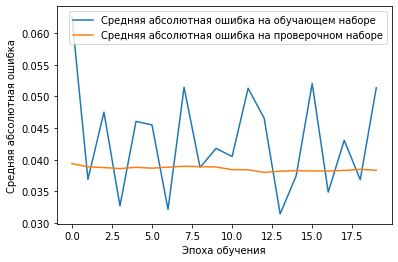

In [211]:
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()